<a href="https://colab.research.google.com/github/b02203054/CreditCard/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
#basically import everything

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.initializers import glorot_uniform
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import os
os.chdir('/content/drive/My Drive/In OU study time/OU lectures/MIT5970/')


In [ ]:
# load the data 
my_data = pd.read_csv("/content/drive/My Drive/In OU study time/OU lectures/MIT5970/machine_learning_project_KNN_model/UCICreditCardplus.csv", delimiter=",")
my_data[0:5]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,nodefault
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,nodefault
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,nodefault


In [ ]:
# set up the variables and target
X = my_data[['LIMIT_BAL','SEX',
             'EDUCATION',
             'MARRIAGE',
             'AGE',
             'PAY_0',
             'PAY_2',
             'PAY_3',
             'PAY_4',
             'PAY_5',
             'PAY_6',
             'BILL_AMT1',
             'BILL_AMT2',
             'BILL_AMT3',
             'BILL_AMT4',
             'BILL_AMT5',
             'BILL_AMT6',
             'PAY_AMT1',
             'PAY_AMT2',
             'PAY_AMT3',
             'PAY_AMT4',
             'PAY_AMT5',
             'PAY_AMT6']].values

y = my_data["default payment next month"]


In [ ]:
# split the data into training group and test group
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print(np.shape(X_testset))

(9000, 23)


In [ ]:
#set up the depth we want to achieve, since it's a decision "tree"
CreditcardTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# it shows the default parameters
CreditcardTree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#finally fit the data into the model
CreditcardTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# make the prediction
PredTree = CreditcardTree.predict(X_testset)

In [ ]:
# compared with prediction and actual datasets to understand how accurate the model is
# formula of "accuracy" : # of correctly predict datasets in testset / total # datasets in testset 
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, PredTree))

DecisionTrees's Accuracy:  0.8284444444444444


In [ ]:
# import more things 
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

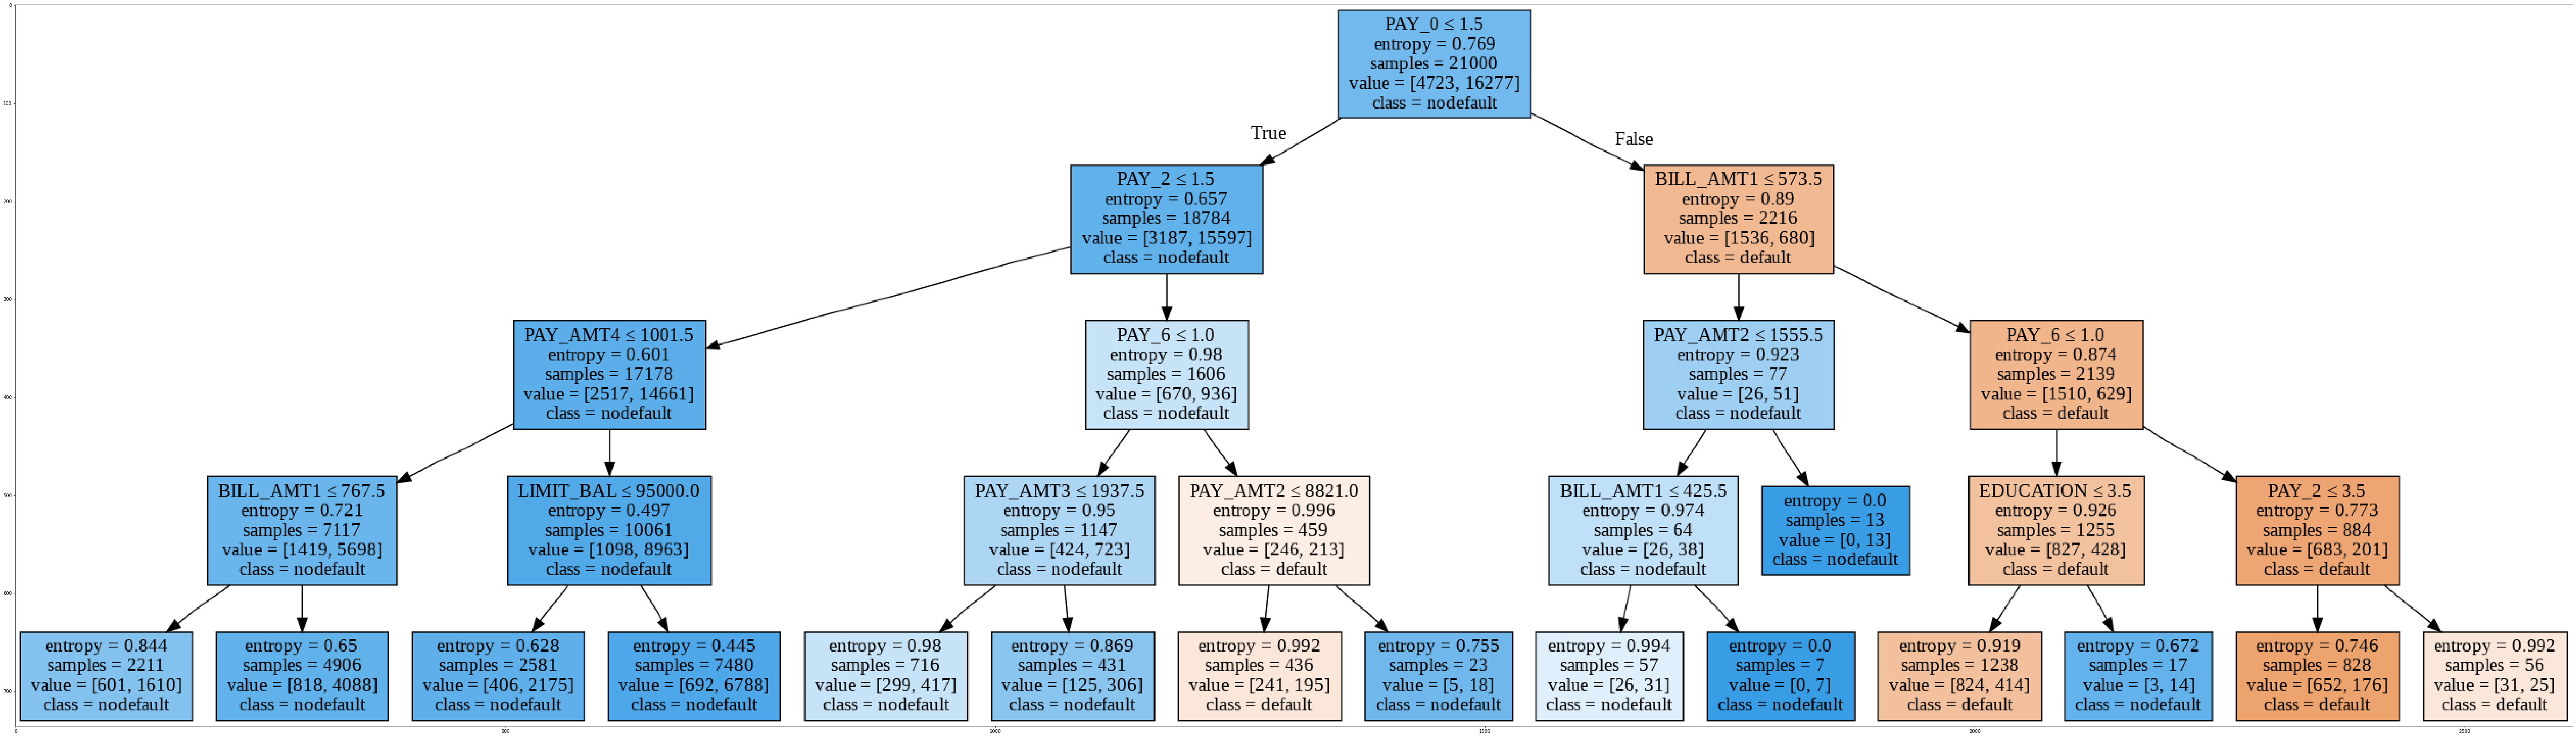

In [ ]:
# visualize the model 
dot_data = StringIO()
filename = "Predtree.png"
featureNames = my_data.columns[1:24]
targetNames = my_data["default payment next month"].unique().tolist()
out=tree.export_graphviz(CreditcardTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
re_data = pd.read_csv("/content/drive/My Drive/MIT5970/machine_learning_project_KNN_model/UCI_Credit_Card.csv", delimiter=",")
re_data = re_data.drop(columns=['ID'])
re_data[0:5]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(re_data[[
             'LIMIT_BAL','SEX',
             'EDUCATION',
             'MARRIAGE',
             'AGE',
             'PAY_0',
             'PAY_2',
             'PAY_3',
             'PAY_4',
             'PAY_5',
             'PAY_6',
             'BILL_AMT1',
             'BILL_AMT2',
             'BILL_AMT3',
             'BILL_AMT4',
             'BILL_AMT5',
             'BILL_AMT6',
             'PAY_AMT1',
             'PAY_AMT2',
             'PAY_AMT3',
             'PAY_AMT4',
             'PAY_AMT5',
             'PAY_AMT6']])
y = np.asanyarray(re_data[["default.payment.next.month"]])
regr.fit (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print ('Coefficients: ', regr.coef_)
regr.score(x, y)

Coefficients:  [[-9.05316482e-08 -1.45313763e-02 -1.51273575e-02 -2.38215135e-02
   1.40949931e-03  9.57054669e-02  1.94561569e-02  1.16741658e-02
   3.36189863e-03  5.69939979e-03  7.92019704e-04 -6.22465927e-07
   1.58703031e-07  3.00530071e-08 -6.79349887e-08 -2.04872291e-08
   1.15259313e-07 -7.43691308e-07 -2.09190755e-07 -2.87353920e-08
  -2.52077019e-07 -3.40958059e-07 -9.76977762e-08]]


0.124015628230567

In [ ]:
orig_list = [1, 2, 3, -1, -2]
print (orig_list)
for item in orig_list: 
    print(item * item)
              
          



[1, 2, 3, -1, -2]
1
4
9
1
4
